In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# label load

In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_test_labels = np.array(test_X)
print(one_hot_test_labels)
print(one_hot_test_labels.shape)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(935, 262)


# decoder load

In [7]:
#decoder = load_model('./save_models/ae/stacked_decoder_v7.h5')

In [8]:
decoder = load_model('./save_models/decoder_models/residual_decoder_v17.h5')

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [9]:
pred = pd.read_excel('./pred_cnn_v1.xlsx')
pred = pred.drop(['Unnamed: 0'], axis=1)
pred

,0,1,2,3
0,5.374325,7.567610,4.484828,6.604812
1,5.404893,3.025724,5.068420,3.856532
2,3.549501,2.162941,1.948915,2.499711
3,3.585981,2.042165,3.832569,2.850304
4,2.443440,1.758970,3.480110,2.435573
...,...,...,...,...
930,3.714064,3.114002,2.080541,3.139562
931,2.910662,3.619677,2.754081,3.362801
932,3.572850,2.978082,1.684880,2.936115
933,3.073053,3.915118,1.930801,3.552372


In [10]:
test_decode = decoder.predict(np.array(pred))
test_decode

array([[1.0925828e-03, 1.7488527e-15, 9.9998295e-01, ..., 2.8429932e-14,
        1.9494015e-05, 2.0617945e-09],
       [1.8111086e-05, 2.4308590e-11, 9.9050643e-09, ..., 8.8387880e-11,
        7.0731684e-11, 1.5480966e-06],
       [4.0599834e-03, 1.9936285e-06, 1.4154708e-03, ..., 4.9909719e-05,
        6.4812923e-07, 6.6191233e-06],
       ...,
       [1.2789929e-02, 8.9949090e-08, 5.9208471e-02, ..., 1.1105318e-06,
        5.1328872e-05, 2.3276373e-06],
       [8.3274664e-03, 7.8578060e-09, 6.8458670e-01, ..., 8.9037762e-08,
        2.8236661e-04, 2.0469897e-06],
       [4.6408018e-03, 5.7514239e-07, 1.5163632e-01, ..., 1.4120891e-06,
        4.7908429e-06, 1.5626246e-03]], dtype=float32)

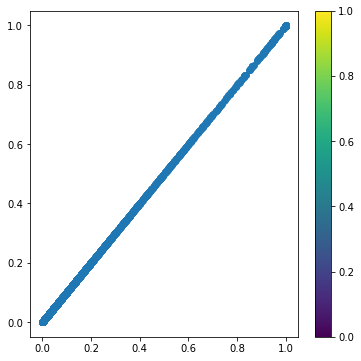

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [12]:
"""test_predict = test_decode.round()
test_predict"""

'test_predict = test_decode.round()\ntest_predict'

In [13]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [15]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [16]:
#c_matrix.shape

In [17]:
#c_matrix

In [18]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.011764705882352941
precision :  0.1976401179941003
recall :  0.0403371462974112
f1 :  0.067
------------------------
hamming_loss :  0.007617259256235458


In [19]:
"""test_predict_df = pd.DataFrame(test_predict)
test_predict_df"""

'test_predict_df = pd.DataFrame(test_predict)\ntest_predict_df'

In [20]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')